In [2]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import math as mt
import os
import pickle


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1Metal device set to:  Physical GPUs, 1 Logical GPUs


2022-06-29 23:19:11.163325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-29 23:19:11.163471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [3]:
model=tf.keras.models.load_model('/Users/ariqrahman/Desktop/Mac-Neural-Network-Project/model/base_model/gcn:v1')

In [4]:
with open('data/test/x_test.pkl','rb') as f:
        x3=pickle.load(f)
with open('data/test/y_test.pkl','rb') as f:
        y3=pickle.load( f)

In [5]:
predy3=model.predict(x3)

2022-06-29 23:19:36.109779: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-29 23:19:36.295786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
predy3[0]

array([0.02158852, 0.03640825, 0.03170202, 0.04044587, 0.01680404,
       0.15672651, 0.69632494], dtype=float32)

In [7]:
pred=np.array([ np.float32(np.argmax(v)) for v in predy3])


In [8]:
max(pred)

6.0

In [9]:
with open('data/pred.pkl','wb') as f:
        pickle.dump(pred, f)


In [1]:
pip install sklearn 

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=eb662d846df37835c2094a482fdd0d5eeb86e7e66053c244e0c06417223895ab
  Stored in directory: /Users/ariqrahman/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
with open('data/pred.pkl','rb') as f:
        pred=pickle.load(f)
with open('data/test/y_test.pkl','rb') as f:
        y3=pickle.load( f)

In [7]:
cnt=0
for v in range(len(pred)):
    if pred[v]==y3[v]:
        cnt+=1

In [8]:
print(cnt/len(pred))

0.25148809523809523


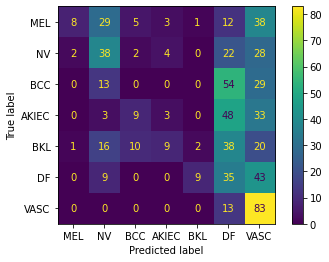

In [4]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
 
classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
 
# real=[1,2,3,0,2,4,6,5,4,3,5,3,4,6,6,6,1,2,3]
# predict=[1,3,3,2,2,4,1,3,4,5,6,6,5,3,4,4,1,2,4]

confusion_mat = confusion_matrix(y3, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classes)
disp.plot()
plt.show()

In [5]:
v=set(list(y3))

In [6]:
print(v)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}
